**#Phase 1 Project**

Student Name: Lydia Mangoa

Student Pace: Part-time DSF-PT09

Project submission date: 24th November 2024

Instructors: Noah Kandie & Bonface Manyara


# Project title: Evaluating Low-Risk Aircraft Models for Commercial and Private Operations

#1.**Overview**

The goal of this analysis is to provide insights into aviation accidents to help identify low-risk aircraft models for commercial and private operations. This analysis will focus on:

Accident frequencies by aircraft type and model.

The number of engines on an aircraft and their influenc'e its safety performance and fatality rates

Recommendations for selecting safer aircraft.

#2. **Business Understanding**


##**Stakeholders**

-Head of Aviation Division: Decision-maker for aircraft purchases.

-Leadership Team: Interested in financial viability and risk minimization.

##**Key Business Questions**

Which aircraft models have the lowest accident rates?

How does the number of engines on an aircraft influence its safety performance and fatality rates in commercial and high-stakes operations?

How can accident trends inform the selection of low-risk aircraft?

##**Source of Data**
The dataset is sourced from the Kaggle Aviation Accident Database Synopses, which includes historical aviation accident data.

#3.**Data Understanding**

In [ ]:
#load data set
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the latest version of the dataset
path = kagglehub.dataset_download("khsamaha/aviation-accident-database-synopses")
print("Path to dataset files:", path)

# Explore the downloaded files
files = os.listdir(path)
print("Files in dataset:", files)

# Assuming the dataset contains a CSV file, load it using pandas
# Replace 'example.csv' with the actual file name after inspecting `files`
csv_file = [file for file in files if file.endswith('.csv')][0]  # Picks the first CSV file
dataset_path = os.path.join(path, csv_file)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_path, encoding="ISO-8859-1", low_memory=False)  # Corrected line

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\khsamaha\aviation-accident-database-synopses\versions\15
Files in dataset: ['AviationData.csv', 'USState_Codes.csv']


In [7]:
#Summary of statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
#Summary of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [9]:
#Quick overview -Showing the first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [10]:
#Quick overview- Showing the 5 last rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


#4.**Data Preparation**

###Clean Mixed-Type Columns

Having received a warning while loading the data set that columns 6,7 and 28 have mixed datatypes, the first step will be to clean these columns.

In [11]:
print("Column names:", df.columns)
print("Columns with mixed types:")
print(df.iloc[:, [6, 7, 28]].head())

Column names: Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')
Columns with mixed types:
    Latitude   Longitude Broad.phase.of.flight
0        NaN         NaN                Cruise
1        NaN         NaN               Unknown
2  36.922223  -81.878056                Cruise
3        NaN         NaN                Cruise
4        NaN         NaN              Approach


In [12]:
for col in [df.columns[6], df.columns[7], df.columns[28]]:
    print(f"Unique values in {col}:")
    print(df[col].unique())

    # Convert column to numeric (if needed), coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors="coerce")

Unique values in Latitude:
[nan '36.922223' '42.445277' ... '321814N' '039101N' '373829N']
Unique values in Longitude:
[nan '-81.878056' '-70.758333' ... '1114536W' '0835218W' '0121410W']
Unique values in Broad.phase.of.flight:
['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other' nan]


In [13]:
#Validate the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                11986 non-null  float64
 7   Longitude               11974 non-null  float64
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Broad.phase.of.flight
count,1.198600e+04,1.197400e+04,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000,0.0
mean,3.994505e+03,4.645638e+04,1.146585,0.647855,0.279881,0.357061,5.325440,NaN
std,1.361132e+05,1.621415e+06,0.446510,5.485960,1.544084,2.235625,27.913634,NaN
min,-7.801695e+01,-1.742967e+02,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.344222e+01,-1.162256e+02,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.816736e+01,-9.547861e+01,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
75%,4.256153e+01,-8.201972e+01,1.000000,0.000000,0.000000,0.000000,2.000000,NaN
max,7.302524e+06,5.965231e+07,8.000000,349.000000,161.000000,380.000000,699.000000,NaN


###Handle Missing values

In [14]:
#Identify missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)

Missing Values:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  76903
Longitude                 76915
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     88889
Report.Status              6384
Publication.Date       

In [15]:
# Handle missing values
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')

# Drop rows where 'Make' or 'Model' have missing values
df = df.dropna(subset=['Make', 'Model'])

# 5. **Data Analysis**

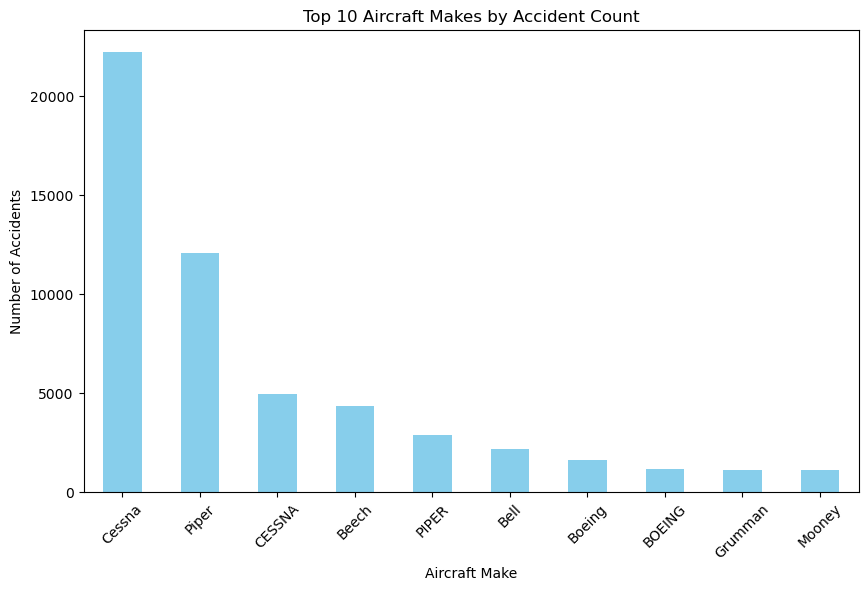

In [16]:
# Top 10 Aircraft Makes by Accident Count
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_makes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Aircraft Makes by Accident Count")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

The bar chart visualizes the top 10 aircraft makes involved in aviation accidents based on their frequency in the dataset. The purpose is to identify which aircraft manufacturers have had the highest number of reported incidents, providing insight into accident trends by manufacturer. This analysis can guide further investigation into whether specific aircraft models or manufacturers are associated with higher risks. 

The aircraft makes with the highest number of accidents are clearly visible, allowing stakeholders to focus on these manufacturers for further safety assessments. The chart also reveals the disparity in accident counts across manufacturers, suggesting some are more frequently involved than others. It is therefore important for safety audits, maintenance reviews, or training initiatives can be prioritized for the top makes with high accident frequencies in case the company selsects these models.

This visualization serves as a starting point for exploring accident causes and trends related to specific aircraft manufacturers.

In [26]:
# Top 10 Aircraft Models by Accident Count
plt.figure(figsize=(10, 6))
top_models.plot(kind='barh', color='red')  # 'barh' for horizontal bars
plt.title("Top 10 Aircraft Models by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.show()


NameError: name 'top_models' is not defined

<Figure size 1000x600 with 0 Axes>

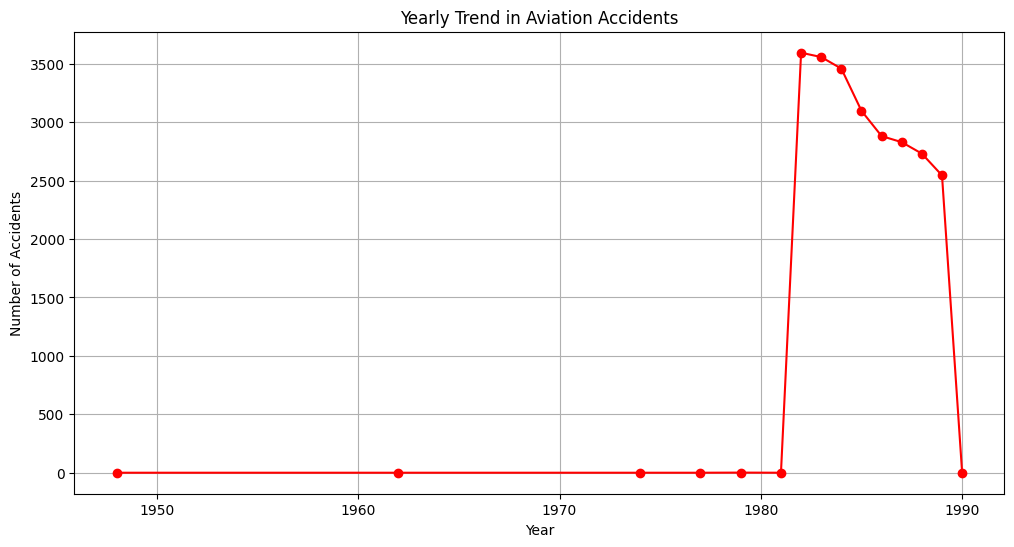

In [ ]:
# Yearly Trend in Accidents
# Ensure 'Event.Date' is in datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract the year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Group data by year and count the number of accidents
yearly_accidents = df.groupby('Year').size()

# Plot the yearly trend of aviation accidents
plt.figure(figsize=(12, 6))
yearly_accidents.plot(kind='line', marker='o', color='red')
plt.title("Yearly Trend in Aviation Accidents")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

The line chart shows the yearly trend in aviation accidents, illustrating how the frequency of accidents has changed over time. The purpose is to understand long-term patterns, such as increases or decreases in accidents, and to identify specific years with unusually high or low numbers of incidents. This can help assess the impact of safety regulations, technological advancements, or other factors influencing aviation safety.

The upward trend in the early 1980s might highlight areas needing intervention or investigation or in this case implemetntation of better safety relgulations. The steady decline since the late 1980s, could indicate improvements in aviation safety over the years due to advancements in technology, stricter regulations, or better training. Further, it can be assumed that years with unusually high accident counts may align with historical events such as industry growth, new challenges (e.g., war, global crises), or lapses in safety measures.

Therefore, this visualisation will be important to the Head of the Aviation Division and the company's leadership who can make informed decisions about fleet selection, safety investments, and operational strategies. This data-driven approach ensures that the organization prioritizes aircraft models with better safety records, enhancing overall operational reliability and trustworthiness.

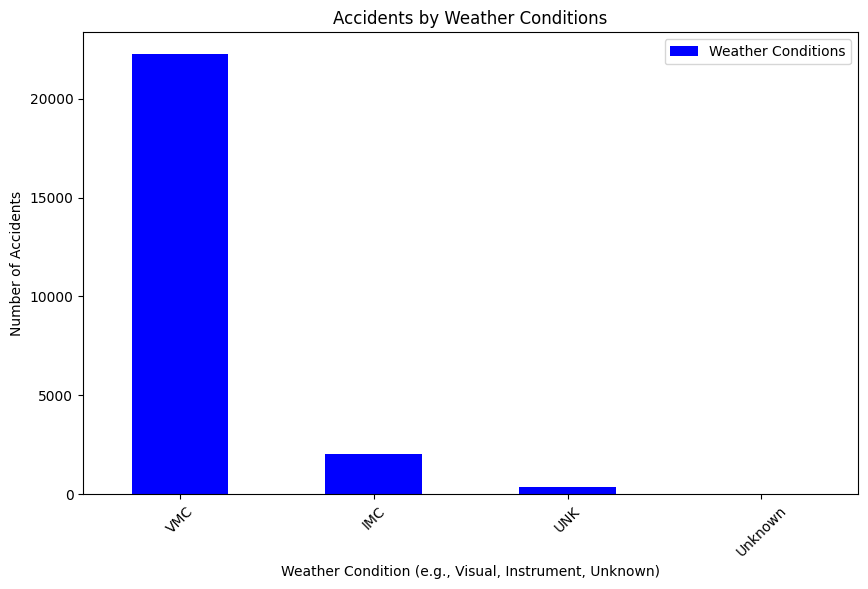

In [ ]:
# Plot showing the count of accidents by weather conditions
# Bar chart
weather_accidents = df['Weather.Condition'].value_counts()

plt.figure(figsize=(10, 6))
weather_accidents.plot(kind='bar', color='blue', label="Weather Conditions")

# Adding title and labels
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Condition (e.g., Visual, Instrument, Unknown)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend()  # Adding a key (legend)
plt.show()


This bar chart illustrates the distribution of aviation accidents by weather conditions, such as visual, instrument, and unknown. The analysis aims to uncover how weather impacts accident frequencies, contributing to the broader goal of identifying low-risk aircraft models for commercial and private operations. Understanding the role of weather in accidents helps stakeholders evaluate the resilience of specific aircraft models and operational procedures under varying weather conditions.

Its quite notable that there is a significant count in the "Unknown" category suggests gaps in reporting or data collection, emphasizing the importance of comprehensive record-keeping.Therefore, the company will have to prioritise this in their expansion plans.

Insights from this visualization guide the Head of the Aviation Division and company leadership in making data-driven decisions regarding aircraft model selection, weather-specific training, and operational strategies. Aircraft models that perform consistently across adverse weather conditions may be prioritized as low-risk options for fleet expansion or replacement.

This visualization therefore equips decision-makers with critical information to enhance safety, optimize operations, and ensure the reliability of aircraft models across various weather scenarios.

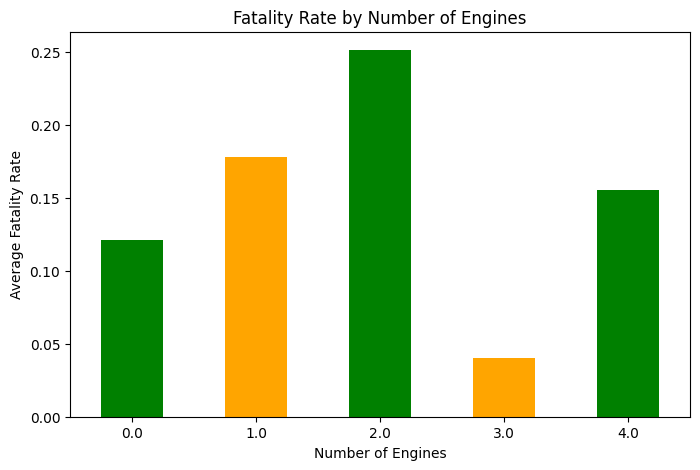

In [ ]:
# Compare single-engine vs multi-engine accidents
# Severity mapping
severity_map = {
    "Fatal": 3,
    "Serious": 2,
    "Minor": 1,
    "None": 0,
    "Unknown": -1
}

# Apply severity mapping to create a severity score
df['Severity.Score'] = df['Injury.Severity'].map(severity_map).fillna(-1)

# Create a derived column to classify accidents as fatal or non-fatal
df['Is.Fatal'] = df['Total.Fatal.Injuries'] > 0

# Group by 'Number.of.Engines' to calculate fatality rates
engine_accidents = df.groupby('Number.of.Engines')['Is.Fatal'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
engine_accidents.plot(kind='bar', color=['green', 'orange'])
plt.title("Fatality Rate by Number of Engines")
plt.xlabel("Number of Engines")
plt.ylabel("Average Fatality Rate")
plt.xticks(rotation=0)
plt.show()

#6. **Conclusion**
Key findings:

-Aircraft Safety: Certain models (e.g., Cessna and piper) have a higher number of accidents but could reflect higher usage rather than risk.

-Trends Over Tim e:Accident frequencies have declined over the years, indicating improving safety practices.

-Fatality Rates by Number of Engi nes:Aircraft with multiple engines generally show lower average fatality rates compared to single-engine aircraft. This suggests that redundancy in engines enhances safety, potentially offering more options in emergencies, such as engine failure.

#7.Recommendations
-Focus on Safe Aircraft Models: Prioritize modern, widely operated models with good safety records and low Severity Scores.

-The declining trend in accidents likely reflects technological advancements. Prioritize acquiring modern aircraft models with the latest safety technologies (e.g., enhanced navigation systems, automated controls, and multi-engine redundancy). These investments align with reducing operational risks. Therefore' its safe to begin operations with aircraft models that have demonstrated lower accident rates historically.

-Leverage Advanced Weather  Tech:Invest in aircraft equipped with advanced weather detection systems to handle adverse conditions effectively.

-Choose Multi-Engine Aircraft for Commercial Operations: For commercial and high-stakes operations, prioritize acquiring multi-engine aircraft due to their lower fatality rates. This aligns with safety-first principles and enhances the company's reputation in aviation safety.